In [60]:
import pyathena as pa
from pyathena.tigress_ncr.ncr_paper_lowz import LowZData
from pyathena.tigress_ncr.ncr_paper_lowz import get_PW_zprof
import matplotlib.pyplot as plt
import cmasher as cmr
from labellines import labelLines

In [ ]:
plt.style.use('ncr-paper.mplstyle')

In [74]:
pdata = LowZData()

LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rs

R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0
R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4-b10 LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy10

In [5]:
pdata.mgroup['LGR2-S150-Om100q0'][1]

'LGR2_4pc_NCR_S150.full.b2.Om01.q0.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8'

In [66]:
s = pdata.sa.set_model(pdata.mgroup['LGR2-S150-Om100q0'][0])
# s = pdata.sa.set_model(pdata.mgroup['LGR2-S150-Om100q0'][1])

In [7]:
trange = pdata.get_trange(s)
s.zprof = get_PW_zprof(s)
s.zprof = s.zprof.sel(time=trange)

In [21]:
def plot_quantile(data,qmin=0.25,qmax=0.75,**kwargs):
    qd = data.quantile(dim='time',q=[qmin,0.5,qmax])
    l,=plt.plot(qd.z, qd.sel(quantile=0.5),**kwargs)
    plt.fill_between(qd.z, qd.sel(quantile=qmin),qd.sel(quantile=qmax),color=l.get_color(),alpha=0.25,lw=0)

# plt.yscale('log')

In [30]:
phcolors={"2p":"tab:blue","WIM":"tab:orange","hot":"tab:red"}

In [68]:
outdir = "lowZ-figures-PW"
os.makedirs(outdir,exist_ok=True)

In [73]:
for m in pdata.mlist:
    fig,axes = plt.subplots(1,3,figsize=(12,4))
    s = pdata.sa.set_model(m)
    trange = pdata.get_trange(s)
    if not hasattr(s,"zprof"): s.zprof = get_PW_zprof(s)
    s.zprof = s.zprof.sel(time=trange)

    # volume fraction
    plt.sca(axes[0])
    for ph in s.zprof.phase.data:
        plot_quantile(s.zprof['A'].sel(phase=ph),label=ph,color=phcolors[ph])
    plt.xlabel('z[pc]')
    plt.ylabel(r'$f_V$')
    labelLines(plt.gca().lines,xvals=(-1500,-1000))

    # zprof
    plt.sca(axes[1])
    plot_quantile(s.zprof['W'].sum(dim='phase')*s.u.pok,label="W",color="k")
    plot_quantile(s.zprof['Ptot'].sum(dim='phase')*s.u.pok,label="Ptot",color="k",ls='--')
    for ph in s.zprof.phase.data:
        Ptot= s.zprof['Ptot'].mean(dim='time')/s.zprof['A'].mean(dim='time')*s.u.pok
        plt.plot(s.zprof.z,Ptot.sel(phase=ph),
                label=ph,color=phcolors[ph])

    plt.xlabel('z[pc]')
    plt.ylabel(r'$P/k_B$')
    plt.legend()
    # labelLines(plt.gca().lines,xvals=(-1500,-1000))

    # time series
    plt.sca(axes[2])
    plt.plot(s.zprof.time,s.zprof['W'].sum(dim='phase').sel(z=slice(-50,50)).mean(dim='z')*s.u.pok,label="W",color="k")
    plt.plot(s.zprof.time,s.zprof['Ptot'].sum(dim='phase').sel(z=slice(-50,50)).mean(dim='z')*s.u.pok,label="Ptot",color="k",ls='--')
    for ph in s.zprof.phase.data:
        Ptot= s.zprof['Ptot'].sel(z=slice(-50,50)).mean(dim='z')/s.zprof['A'].sel(z=slice(-50,50)).mean(dim='z')*s.u.pok
        plt.plot(s.zprof.time,Ptot.sel(phase=ph),
                label=ph,color=phcolors[ph])
    plt.xlabel('time')
    plt.ylabel(r'$P/k_B$')

    plt.tight_layout()

    fig.savefig(os.path.join(outdir,f"{m}_PW_prof.png"))
    fig.clf()
    plt.close()

In [ ]:
def get_color(Zdust, cmap=cmr.guppy, Zmin=-1.3, Zmax=0.3):
    norm = Normalize(vmin=Zmin, vmax=Zmax)
    c = cmap(norm(np.log10(Zdust)))
    return c


def get_kwargs(name, cmap=cmr.guppy, Zmin=-1.3, Zmax=0.3):
    if "Zd0.025" in name:
        marker = "s"
    elif "Om01" in name:
        marker = "v"
    elif "Om02" in name:
        marker = "^"
    elif "b10" in name and "S05" not in name:
        marker = "*"
    else:
        marker = "o"
    if "Zd0.025" in name:
        Zdust = 0.025
    elif "Zd0.1" in name:
        Zdust = 0.1
    elif "Zd0.3" in name:
        Zdust = 0.3
    elif "Zd1" in name:
        Zdust = 1
    c = get_color(Zdust)
    return dict(marker=marker, color=c)

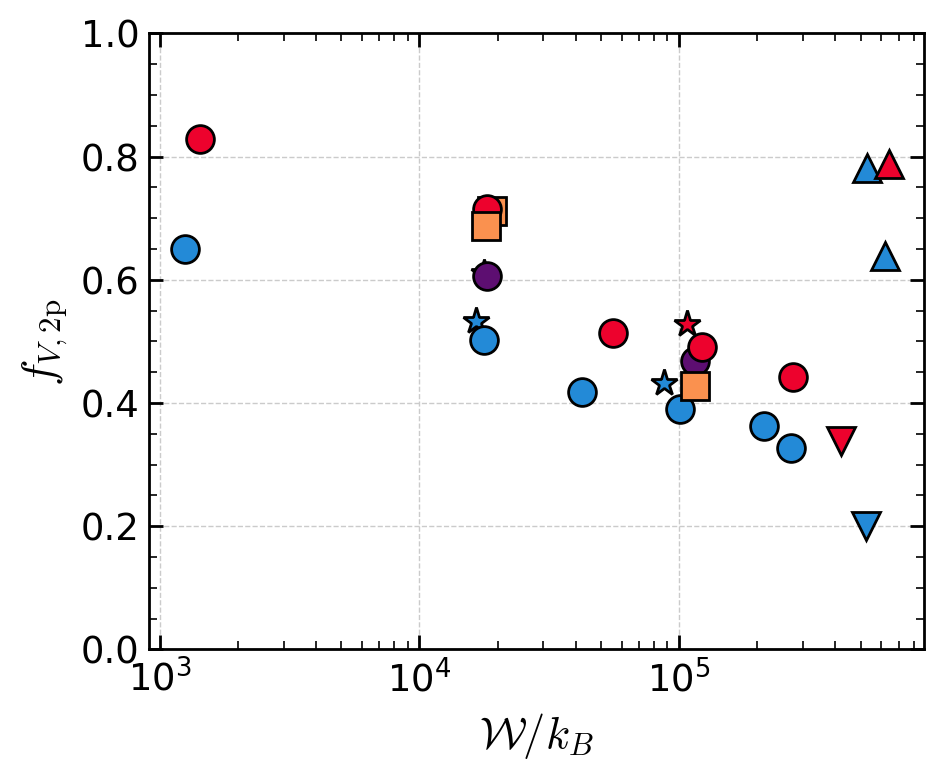

In [72]:
plt.figure(figsize=(5,4))
for m in pdata.mlist:
    s = pdata.sa.set_model(m)
    trange = pdata.get_trange(s)
    if not hasattr(s,"zprof"): s.zprof = get_PW_zprof(s)
    s.zprof = s.zprof.sel(time=trange)
    kwargs = get_kwargs(m)
    Ahot = s.zprof['A'].sel(z=slice(-50,50)).mean(dim='z').sel(phase='hot')
    A2p = s.zprof['A'].sel(z=slice(-50,50)).mean(dim='z').sel(phase='2p')
    weight = s.zprof['W'].sum(dim='phase').sel(z=slice(-50,50)).mean(dim='z')*s.u.pok

    # plt.semilogx(weight.mean(),Ahot.mean(),marker='o',color=s.color)
    plt.semilogx(weight.mean(),A2p.mean(),ms=10,mew=1,mec='k',**kwargs)

plt.xlabel(r'${\cal W}/k_B$')
plt.ylabel(r'$f_{V,{\rm 2p}}$')
plt.ylim(0,1)

fig.savefig(os.path.join(outdir,"fV2p_W.png"))